<a href="https://colab.research.google.com/github/Leonardogamu/mcd---aprendizaje_automatico_2025/blob/main/Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 5

In [ ]:
import pandas as pd

data=pd.read_csv('/content/health_lifestyle_dataset.csv')
data['gender_bin'] = data['gender'].map({'Male': 0, 'Female': 1})
data['gender'] = data['gender_bin']
data.drop('gender_bin', axis=1, inplace=True) #recordamos la modificacion hecha en tareas previas

data

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,0,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,1,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,0,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,1,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,1,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,53,0,33.1,4726,3.9,2.0,3118,0,1,56,105,76,282,0,0
99996,99997,22,0,35.1,11554,4.5,3.1,1967,0,0,51,149,77,192,0,0
99997,99998,37,0,18.9,3924,3.8,1.0,2328,0,0,69,92,117,218,0,0
99998,99999,72,1,27.8,16110,5.6,0.8,3093,0,0,93,164,72,188,0,0


##1. Primero el algoritmo visto en clase (K Means y Metodo del Codo)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
data_x = data[[
    #'id',
    'age',
    'gender',
    'bmi',
    'daily_steps',
    'sleep_hours',
    'water_intake_l',
    'calories_consumed',
    'smoker',
    'alcohol',
    'resting_hr',
    'systolic_bp',
    'diastolic_bp',
    'cholesterol',
    'family_history'
]]
y = data[['disease_risk']]

In [ ]:
data_x

,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history
0,56,0,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0
1,69,1,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0
2,46,0,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0
3,32,1,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0
4,60,1,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,53,0,33.1,4726,3.9,2.0,3118,0,1,56,105,76,282,0
99996,22,0,35.1,11554,4.5,3.1,1967,0,0,51,149,77,192,0
99997,37,0,18.9,3924,3.8,1.0,2328,0,0,69,92,117,218,0
99998,72,1,27.8,16110,5.6,0.8,3093,0,0,93,164,72,188,0


In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_x)
df_scaled = pd.DataFrame(scaled, columns = data_x.columns)
df_scaled
#estandarizamos para tener todo bajo 1 misma escala porque mis variables tienen distintas dimensiones/medidas

,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history
0,0.622951,0.0,0.113636,0.168325,0.128571,0.644444,0.143623,0.0,0.0,0.959184,0.797753,0.864407,0.604027,0.0
1,0.836066,1.0,0.695455,0.703142,0.857143,0.933333,0.409432,0.0,1.0,0.367347,0.292135,0.084746,0.382550,0.0
2,0.459016,0.0,0.618182,0.043002,0.514286,0.822222,0.158271,0.0,1.0,0.816327,0.370787,0.661017,0.979866,0.0
3,0.229508,1.0,0.918182,0.777515,0.085714,0.333333,0.450161,0.0,0.0,0.428571,0.842697,0.593220,0.167785,0.0
4,0.688525,1.0,0.709091,0.265119,0.114286,0.777778,0.913183,0.0,1.0,0.979592,0.550562,0.016949,0.966443,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.573770,0.0,0.686364,0.196116,0.128571,0.333333,0.685245,0.0,1.0,0.122449,0.168539,0.271186,0.885906,0.0
99996,0.065574,0.0,0.777273,0.555503,0.214286,0.577778,0.274026,0.0,0.0,0.020408,0.662921,0.288136,0.281879,0.0
99997,0.311475,0.0,0.040909,0.153903,0.114286,0.111111,0.403001,0.0,0.0,0.387755,0.022472,0.966102,0.456376,0.0
99998,0.885246,1.0,0.445455,0.795305,0.371429,0.066667,0.676313,0.0,0.0,0.877551,0.831461,0.203390,0.255034,0.0


In [ ]:
#Solo tomare las variables que en la Tarea 4 concluimos como la mejor selección
#adicionalmente de retirar otras que considero no aportan mucho y generaran mas ruido (como gender que es categorica)
df_sel_scaled = df_scaled.head(2000)
#Primero hay que determinar el numero de clusters
inercia = []
for K in range(2,16):
    kmeans = KMeans(n_clusters= K).fit(df_sel_scaled)
    inercia.append(kmeans.inertia_ / K)
inercia

[1527.5407689299934,
 869.8781634778437,
 617.4442417508658,
 453.72425203370324,
 369.67851848483184,
 298.93343255702996,
 248.68162438853307,
 212.74848931399973,
 199.3583626841684,
 170.42436554045574,
 149.9274780371215,
 137.76413364918685,
 125.2017322909611,
 115.52294689714788]

In [ ]:
df_inercias = pd.DataFrame({'n_clusters': range(2, 16), 'inercia': inercia})
df_inercias

,n_clusters,inercia
0,2,1527.540769
1,3,869.878163
2,4,617.444242
3,5,453.724252
4,6,369.678518
5,7,298.933433
6,8,248.681624
7,9,212.748489
8,10,199.358363
9,11,170.424366


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

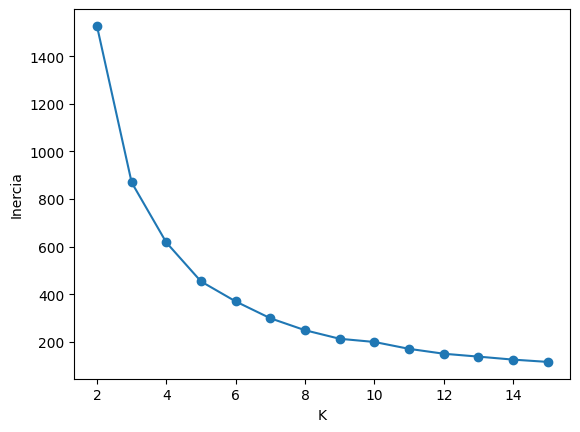

In [ ]:
import matplotlib.pyplot as plt
plt.figure()

plt.plot(
    df_inercias.n_clusters,
    df_inercias.inercia,
    marker = 'o'
)

plt.xlabel('K')
plt.ylabel('Inercia')
plt.savefig("grafico.png")
from google.colab import files
files.download("grafico.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

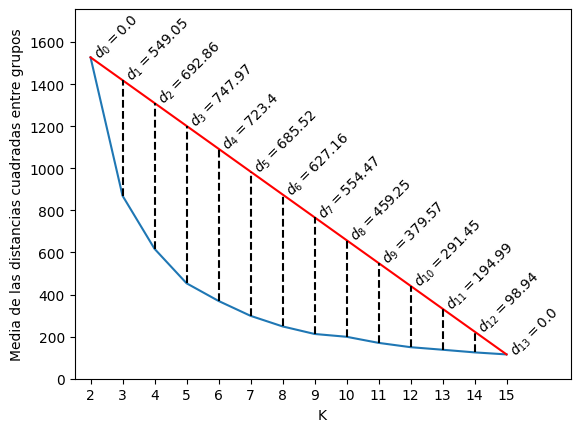

In [ ]:
from numpy import ones,vstack
from numpy.linalg import lstsq
points = [
    (df_inercias.iloc[0, :].n_clusters, df_inercias.iloc[0, :].inercia),
    (df_inercias.iloc[-1, :].n_clusters, df_inercias.iloc[-1, :].inercia)
]
x_coords, y_coords = zip(*points)
A = vstack([x_coords, ones(len(x_coords))]).T
m, b = lstsq(A, y_coords, rcond=None)[0]

plt.figure()
plt.plot(df_inercias.n_clusters, df_inercias.inercia)
plt.plot(df_inercias.iloc[[0, -1], :].n_clusters, df_inercias.iloc[[0, -1], :].inercia, c='r')
for i, r in df_inercias.iterrows():
    d = '$d_{' + str(i) + '}' + f' = {abs(round(r.inercia - (m * r.n_clusters + b), 2)):,}$'
    plt.annotate(d, xytext=(r.n_clusters, m * r.n_clusters + b), xy=(r.n_clusters, m * r.n_clusters + b), rotation = 45)
    plt.plot([r.n_clusters, r.n_clusters], [r.inercia, m * r.n_clusters + b], '--k')
plt.xlabel('K')
plt.ylabel('Media de las distancias cuadradas entre grupos')
plt.xlim((1.5, 17))
plt.ylim((0, 1.15 * df_inercias.inercia.max()))
plt.xticks(range(2, 16))
plt.savefig("grafico.png")
from google.colab import files
files.download("grafico.png")
plt.show()

In [ ]:
#El punto de quiebre ocurre en K = 5, pues es donde se encuentra la distancia maxima.

In [ ]:
#por ende nos quedamos con 5 clusters, por método del codo
kmeans = KMeans(
    n_clusters = 5,
    n_init = 'auto'
).fit(df_sel_scaled)

In [ ]:
df_freq_ck = pd.DataFrame(np.unique(kmeans.labels_, return_counts = True)).T
df_freq_ck.columns = ['ck', 'nk']
df_freq_ck

,ck,nk
0,0,309
1,1,475
2,2,483
3,3,297
4,4,436


In [ ]:
df_centros = pd.DataFrame(kmeans.cluster_centers_)
df_centros
#valores promedio o centroides

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.511751,2.442491e-15,0.513989,0.505706,0.520111,0.500827,0.525152,0.216828,1.000000e+00,0.494221,0.504200,0.506994,0.512760,3.106796e-01
1,0.508956,1.000000e+00,0.481818,0.465464,0.516241,0.505310,0.504535,0.221053,1.942890e-15,0.505134,0.499965,0.491383,0.502974,2.220446e-16
2,0.514951,6.550316e-15,0.491878,0.506076,0.478971,0.513320,0.513688,0.202899,1.942890e-15,0.512063,0.492707,0.477629,0.490767,3.885781e-16
3,0.529392,1.000000e+00,0.490052,0.490275,0.488648,0.499289,0.502031,0.208754,1.000000e+00,0.537827,0.498506,0.473720,0.517773,3.164983e-01
4,0.491502,5.366972e-01,0.492900,0.486518,0.490531,0.511417,0.526274,0.192661,1.831868e-15,0.498362,0.516158,0.479708,0.502386,1.000000e+00


#Ahora con los algoritmos investigados

In [ ]:
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA

optics = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05)
optics_labels = optics.fit_predict(df_sel_scaled)

In [ ]:
df_sel_scaled['cluster'] = optics_labels

/tmp/ipython-input-3720994489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel_scaled['cluster'] = optics_labels


In [ ]:
n_clusters = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de puntos marcados como ruido: {(optics_labels == -1).sum()}")

Número de clusters encontrados: 6
Número de puntos marcados como ruido: 565


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

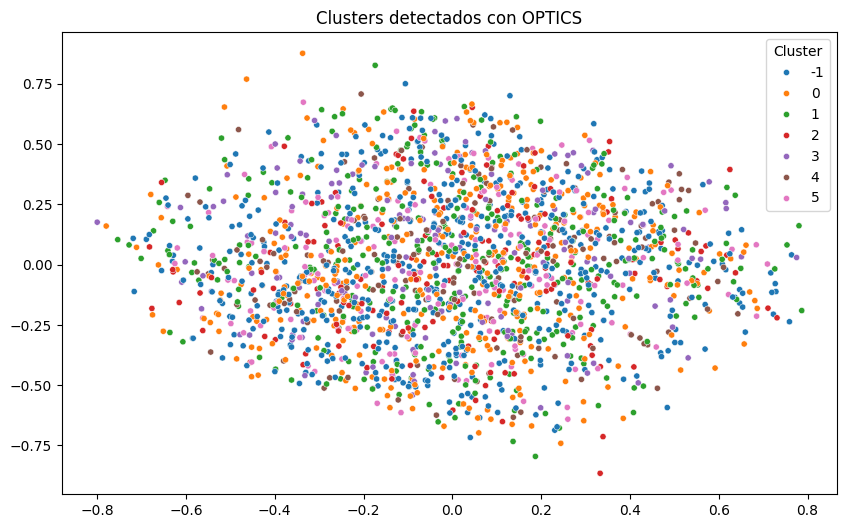

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_sel_scaled[['sleep_hours', 'systolic_bp', 'bmi', 'diastolic_bp']])

plt.figure(figsize=(10,6))
sns.scatterplot(
    x=pca_data[:,0],
    y=pca_data[:,1],
    hue=df_sel_scaled['cluster'],
    palette='tab10',
    s=20
)
plt.title('Clusters detectados con OPTICS')
plt.legend(title='Cluster')
plt.savefig("grafico.png")
from google.colab import files
files.download("grafico.png")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_sel_scaled)
    ch_score = calinski_harabasz_score(df_sel_scaled, labels)
    scores.append(ch_score)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

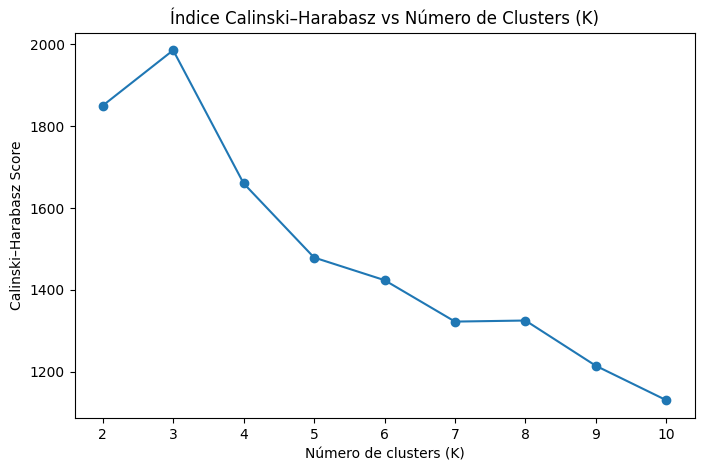

In [ ]:

plt.figure(figsize=(8,5))
plt.plot(K_range, scores, marker='o')
plt.title('Índice Calinski–Harabasz vs Número de Clusters (K)')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Calinski–Harabasz Score')
plt.savefig("grafico.png")
from google.colab import files
files.download("grafico.png")
plt.show()




In [ ]:
for k, s in zip(K_range, scores):
    print(f"K={k}, Calinski–Harabasz={s:.2f}")

best_k = K_range[np.argmax(scores)]
print(f"\n El mejor número de clusters según Calinski–Harabasz es: K={best_k}")

K=2, Calinski–Harabasz=1850.26
K=3, Calinski–Harabasz=1985.75
K=4, Calinski–Harabasz=1660.25
K=5, Calinski–Harabasz=1478.97
K=6, Calinski–Harabasz=1423.63
K=7, Calinski–Harabasz=1322.35
K=8, Calinski–Harabasz=1324.95
K=9, Calinski–Harabasz=1214.22
K=10, Calinski–Harabasz=1130.12

 El mejor número de clusters según Calinski–Harabasz es: K=3
